In [10]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox

In [11]:
pldb = pd.read_csv('../data/pldb.csv')

threshold_year = 2000
pldb['Category'] = pldb['appeared'].apply(lambda x: 'Older' if x < threshold_year else 'Newer')

older_languages = []
newer_languages=[]

for _,d in pldb.iterrows():
    if d['Category'] =='Older': older_languages.append(d['title'])
    else: newer_languages.append(d['title'])


C:\Users\asus\AppData\Local\Temp\ipykernel_13012\3629559834.py:1: DtypeWarning: Columns (15,16,17,25,30,38,41,44,46,47,48,49,50,51,52,53,56,59,60,61,63,69,71,72,73,75,76,78,79,80,81,82,83,84,85,87,89,91,92,93,94,95,96,97,98,99,100,101,103,104,110,111,112,113,114,115,116,117,119,121,122,123,126,128,129,130,131,132,133,134,135,137,138,142,143,144,145,146,147,148,150,151,156,157,158,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,183,184,185,186,187,188,189,190,191,192,194,195,196,197,198,200,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,3

In [12]:
gtrend_df = pd.read_csv('../data/googletrends_complete.csv')

non_zero_columns = gtrend_df.loc[:, (gtrend_df != 0).any(axis=0)]
gtrend_languages = [col for col in non_zero_columns.columns if col != 'Month']  

gtrend_older_languages = list(set(gtrend_languages) & set(older_languages))
gtrend_newer_languages = list(set(gtrend_languages) & set(newer_languages))
gtrend_newer_languages.remove('DML')
gtrend_older_languages.append('Assembly')
gtrend_newer_languages.append('Arduino')


In [13]:
gtrend_newer_scores = gtrend_df[gtrend_newer_languages].mean(axis=0)  
gtrend_older_scores = gtrend_df[gtrend_older_languages].mean(axis=0)  

In [14]:
print("Normality Test for Newer Languages:", stats.shapiro(gtrend_newer_scores))
print("Normality Test for Older Languages:", stats.shapiro(gtrend_older_scores))
print(stats.levene(gtrend_newer_scores, gtrend_older_scores))  

Normality Test for Newer Languages: ShapiroResult(statistic=0.790569431550424, pvalue=0.0002073834445442558)
Normality Test for Older Languages: ShapiroResult(statistic=0.9126298036537287, pvalue=0.015118168109831751)
LeveneResult(statistic=0.4886003131242198, pvalue=0.4876086074715271)


In [15]:
gtrend_newer_scores_boxcox,_ = boxcox(gtrend_newer_scores + np.abs(gtrend_newer_scores.min()) + 1e-9)
gtrend_older_scores_boxcox,_ = boxcox(gtrend_older_scores + np.abs(gtrend_older_scores.min()) + 1e-9)

print("Normality Test for Newer Languages:", stats.shapiro(gtrend_newer_scores_boxcox))
print("Normality Test for Older Languages:", stats.shapiro(gtrend_older_scores_boxcox))
print(stats.levene(gtrend_newer_scores_boxcox, gtrend_older_scores_boxcox))  

Normality Test for Newer Languages: ShapiroResult(statistic=0.9621442953592942, pvalue=0.48300009150568224)
Normality Test for Older Languages: ShapiroResult(statistic=0.961147775216313, pvalue=0.3128031941067865)
LeveneResult(statistic=3.045847905011639, pvalue=0.0867395432262257)


In [16]:
t_stat, p_val = stats.ttest_ind(gtrend_newer_scores_boxcox, gtrend_older_scores_boxcox, equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -4.136727121971373, P-value: 0.00012645396697746547


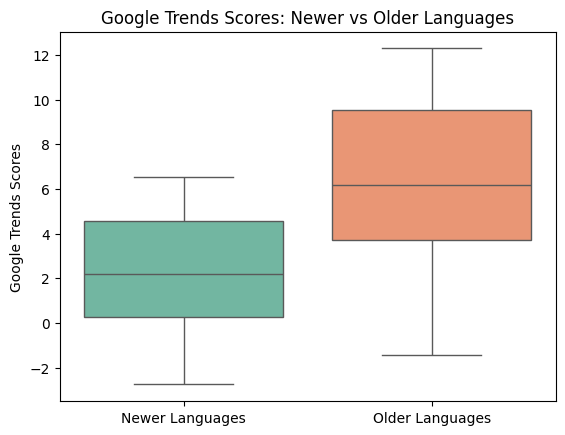

In [17]:
sns.boxplot(data=[gtrend_newer_scores_boxcox, gtrend_older_scores_boxcox], palette='Set2')
plt.xticks([0, 1], ['Newer Languages', 'Older Languages'])
plt.ylabel('Google Trends Scores')
plt.title('Google Trends Scores: Newer vs Older Languages')
plt.show()

------------------------------------------------------------

In [18]:
wiki_df = pd.read_csv('../data/wiki_complete.csv')

non_zero_columns = wiki_df.loc[:, (wiki_df != 0).any(axis=0)]
wiki_languages = [col for col in non_zero_columns.columns if col != 'Date']  

wiki_older_languages = list(set(wiki_languages) & set(older_languages))
wiki_newer_languages = list(set(wiki_languages) & set(newer_languages))

wiki_newer_languages.append('Arduino')
wiki_older_languages.append('Assembly')
wiki_older_languages.append('FoxPro')
wiki_newer_languages.append('Kernel')
wiki_newer_languages.append('SQLAlchemy')

In [19]:
wiki_newer_scores = wiki_df[wiki_newer_languages].mean(axis=0)  
wiki_older_scores = wiki_df[wiki_older_languages].mean(axis=0)  

In [20]:
print("Normality Test for Newer Languages:", stats.shapiro(wiki_newer_scores))
print("Normality Test for Older Languages:", stats.shapiro(wiki_older_scores))
print(stats.levene(wiki_newer_scores, wiki_older_scores))  

Normality Test for Newer Languages: ShapiroResult(statistic=0.5977939189591732, pvalue=2.7939888866664447e-06)
Normality Test for Older Languages: ShapiroResult(statistic=0.7544518546535192, pvalue=1.409575770298915e-05)
LeveneResult(statistic=4.5200158974559335, pvalue=0.03878276752543198)


In [21]:
wiki_newer_scores_boxcox,_ = boxcox(wiki_newer_scores + np.abs(wiki_newer_scores.min()) + 1e-9)
wiki_older_scores_boxcox,_ = boxcox(wiki_older_scores + np.abs(wiki_older_scores.min()) + 1e-9)

print("Normality Test for Newer Languages:", stats.shapiro(wiki_newer_scores_boxcox))
print("Normality Test for Older Languages:", stats.shapiro(wiki_older_scores_boxcox))
print(stats.levene(wiki_newer_scores_boxcox, wiki_older_scores_boxcox))  

Normality Test for Newer Languages: ShapiroResult(statistic=0.9613652573602047, pvalue=0.5714719797574122)
Normality Test for Older Languages: ShapiroResult(statistic=0.9615494085875883, pvalue=0.35871805451847655)
LeveneResult(statistic=24.961737818265775, pvalue=8.52176708250481e-06)


In [22]:
t_stat, p_val = stats.ttest_ind(wiki_newer_scores_boxcox, wiki_older_scores_boxcox, equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -6.625933303988145, P-value: 3.022025923122988e-08


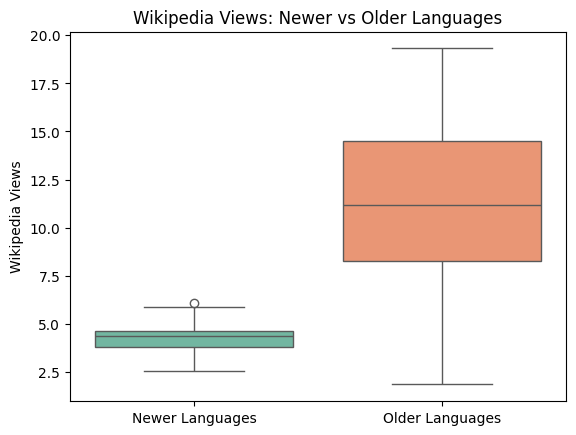

In [23]:
sns.boxplot(data=[wiki_newer_scores_boxcox, wiki_older_scores_boxcox], palette='Set2')
plt.xticks([0, 1], ['Newer Languages', 'Older Languages'])
plt.ylabel('Wikipedia Views')
plt.title('Wikipedia Views: Newer vs Older Languages')
plt.show()